# Сборный проект

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных есть пропуски. Колонки с наибольшим кол-вом пропусков: Critic_Score (52%), User_Score (41%), Rating (41%).

## Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру);

In [5]:
data.columns = data.columns.str.lower()

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [6]:
# Year_of_Release приведём к типу int
# для этого сперва заменим пропуски на -1
data.loc[data['year_of_release'].isna(),'year_of_release'] = -1
data['year_of_release'] = data['year_of_release'].astype('int')
# data.info()

In [7]:
# User_Score приведём к типу float
# для этого сперва заменим пропуски nan и tbd на -1
data['user_score'] = data['user_score'].fillna(-1)
data.loc[data['user_score']=='tbd','user_score'] = -1
data['user_score'] = data['user_score'].astype('float')
# data.info()

Year_of_Release преобразовали в целый тип, т.к. все значения столбца фактически целые. User_Score преобразовали в вещественный, так как оценки это числа и для последующей работы необходима возможность применять арифметические, статистические операции.

### Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [8]:
# пропуски в name удалим, т.к. их всего 2
data = data[~data['name'].isna()]
# data.info()

In [9]:
# пропуски в year_of_release удалим, т.к. их менее 2%
data = data[data['year_of_release']!=-1]
# data.info()

In [10]:
# исследуем пропуски в critic_score
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN


In [11]:
# посмотрим, как зависят пропуски от года релиза
data.groupby('year_of_release').count()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
year_of_release,,,,,,,,,,
1980,9,9,9,9,9,9,9,0,9,0
1981,46,46,46,46,46,46,46,0,46,0
1982,36,36,36,36,36,36,36,0,36,0
1983,17,17,17,17,17,17,17,0,17,0
1984,14,14,14,14,14,14,14,0,14,0
1985,14,14,14,14,14,14,14,1,14,1
1986,21,21,21,21,21,21,21,0,21,0
1987,16,16,16,16,16,16,16,0,16,0
1988,15,15,15,15,15,15,15,1,15,1


In [12]:
# похоже, система оценивания начала развиваться в середине 90-х (esrb основана в 1994)
# т.к. пропусков около половины, удалять их нельзя, а заменять средним или медианой безосновательно
# заменим пропуски на -1
data['critic_score'] = data['critic_score'].fillna(-1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [13]:
# исследуем пропуски в rating
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


In [14]:
# посмотрим, как связаны пропуски в рейтинге с пропусками в оценках
data[(data['rating'].isna()) & (data['critic_score']==-1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


In [15]:
# 98% данных с пропусками в рейтинге также имеют пропуски и в оценках
# 40% данных всего датасета не имеют оценок и рейтинга (10% из них по причине давности выхода игр)
data[data['year_of_release']<1996]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,-1.0,-1.0,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,-1.0,-1.0,NaN
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.00,0.00,0.02,0.00,-1.0,-1.0,NaN
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,-1.0,-1.0,NaN
16207,Rock N' Roll Racing,SNES,1993,Racing,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN


In [16]:
# как зависит рейтинг от жанра игры
data.pivot_table(index='genre',columns='rating',values='name',aggfunc='count')

rating,AO,E,E10+,EC,K-A,M,RP,T
genre,,,,,,,,
Action,1.0,410.0,468.0,1.0,NaN,596.0,NaN,670.0
Adventure,NaN,159.0,67.0,2.0,NaN,98.0,NaN,114.0
Fighting,NaN,8.0,19.0,NaN,NaN,48.0,NaN,357.0
Misc,NaN,449.0,166.0,5.0,1.0,13.0,NaN,228.0
Platform,NaN,354.0,141.0,NaN,NaN,3.0,NaN,63.0
Puzzle,NaN,284.0,42.0,NaN,NaN,NaN,NaN,10.0
Racing,NaN,576.0,95.0,NaN,NaN,18.0,NaN,167.0
Role-Playing,NaN,83.0,111.0,NaN,NaN,161.0,NaN,415.0
Shooter,NaN,47.0,56.0,NaN,NaN,553.0,NaN,340.0


In [17]:
# некоторые закономерности наблюдаются, например, игры жанра Fighting рассчитаны, в основном, на подростков
# но данных недостаточно, что бы заполнить пропуски в rating каким-то усреднённым значением
# заменим пропуски на -1
data['rating'] = data['rating'].fillna(-1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Пропуски в данных были либо удалены (если кол-во пропусков небольшое), либо заменены на значения -1, т.к. для замены средним не было найдено общего признака. Некоторые пропуски связаны с датой выхода игры (до середины 90х не было принято ставить играм оценку и присваивать рейтинг). Значения tbd приравнены к nan и заменены на -1.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [18]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


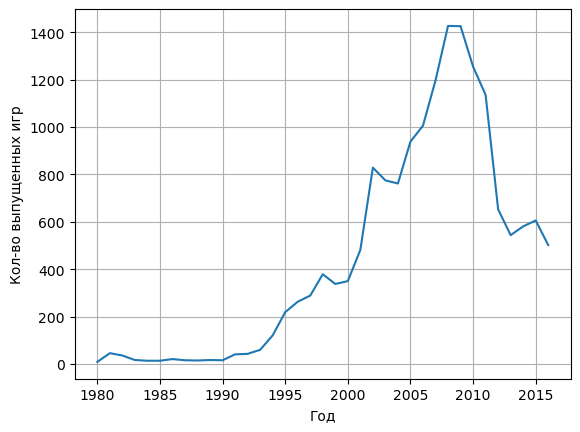

In [19]:
print(data.groupby('year_of_release')['name'].count())
data.groupby('year_of_release')['name'].count().plot(grid=True,xlabel='Год',ylabel='Кол-во выпущенных игр');

До середины 90х выпускалось относительно немного игр. С 94го начался рост производства игр. После 2010 наблюдается спад. Думаю, наиболее актуальными будут данные за период c 2012 года.

### Посмотрите, как менялись продажи по платформам.
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

platform,2600,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,0.02,NaN,NaN,NaN,NaN,53.44,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,1.43,NaN,NaN,NaN,45.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


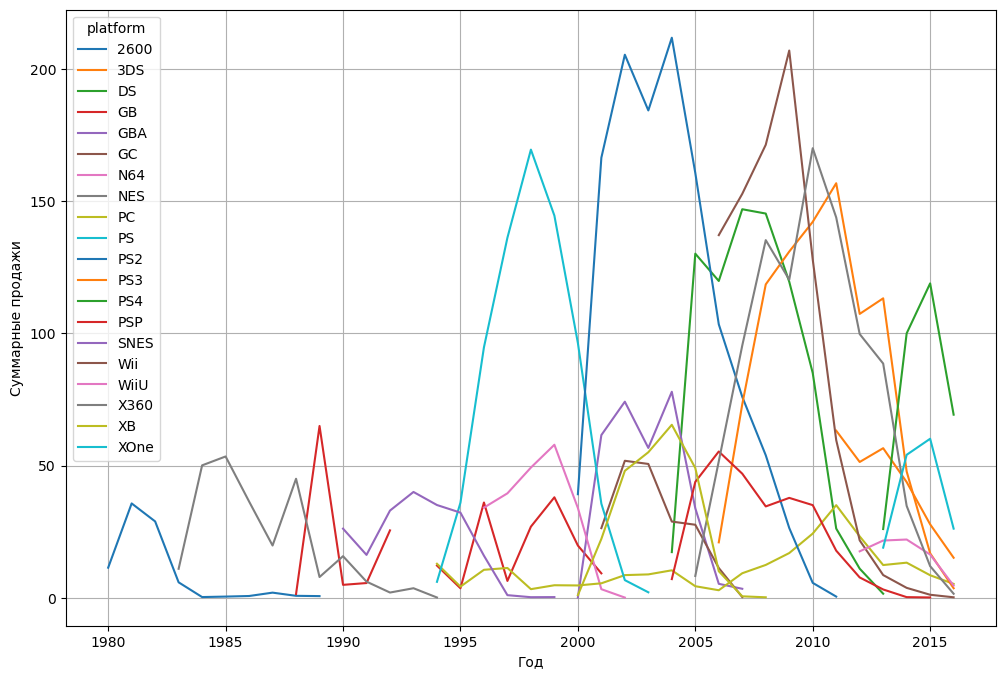

In [20]:
most_sal_plat_list = {}
for p in data['platform'].unique():
    most_sal_plat_list[p] = data[data['platform']==p]['total_sales'].sum().round(2)
most_sal_plat = pd.DataFrame.from_dict(most_sal_plat_list,orient='index')
most_sal_plat = most_sal_plat.sort_values(by=0).tail(20)
display(data.loc[data['platform'].isin(most_sal_plat.index)].\
pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum'))
data.loc[data['platform'].isin(most_sal_plat.index)].\
pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').\
plot(figsize=(12,8),grid=True,xlabel='Год',ylabel='Суммарные продажи');

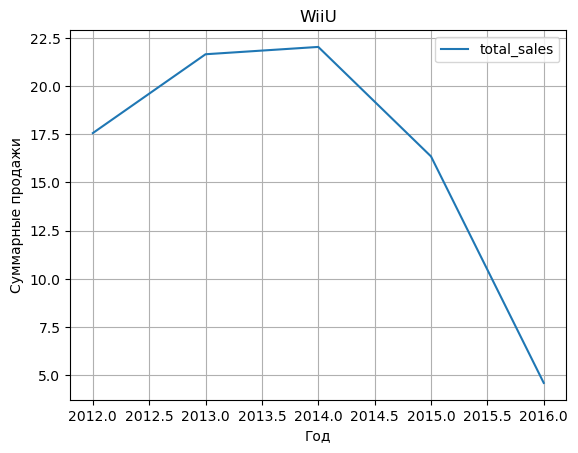

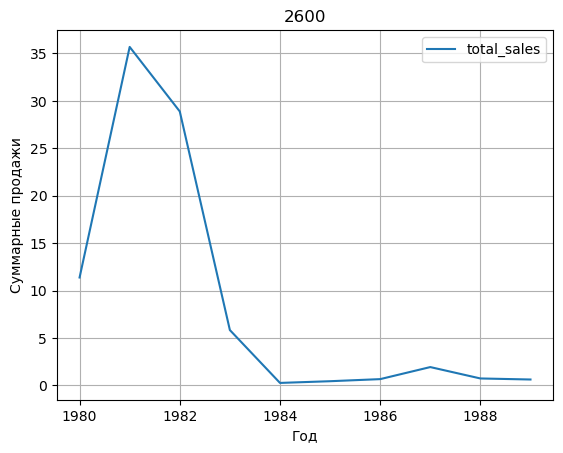

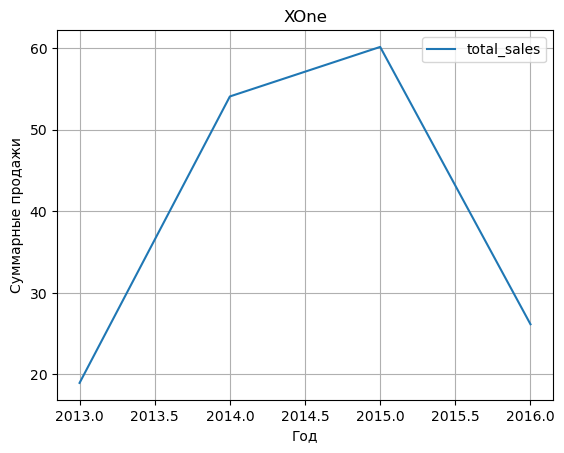

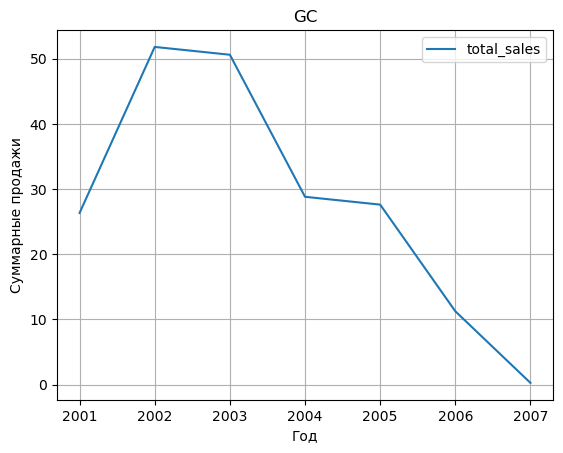

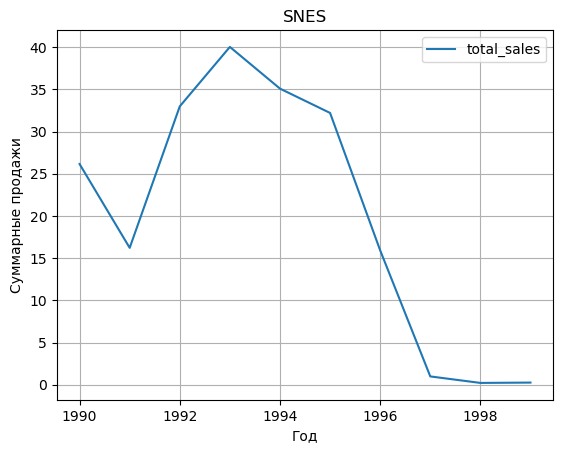

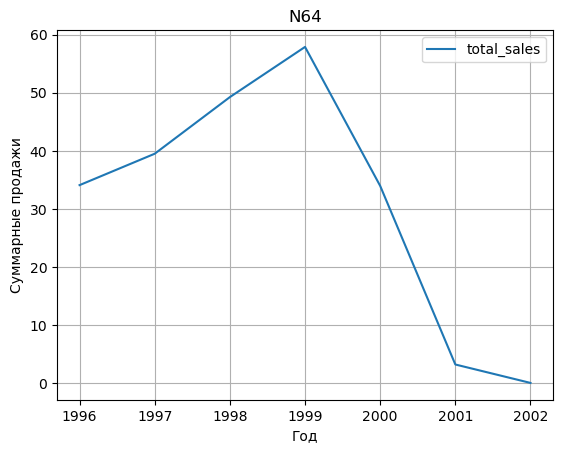

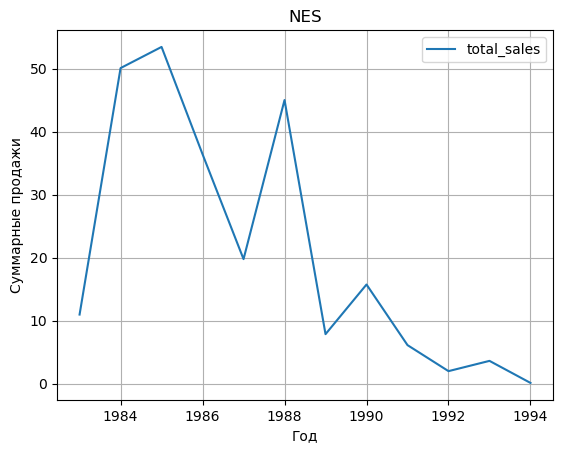

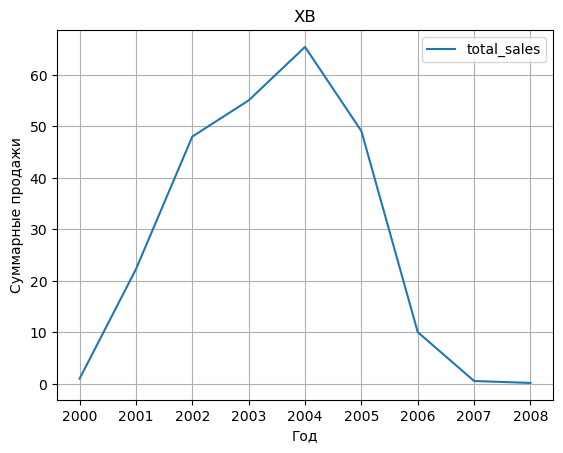

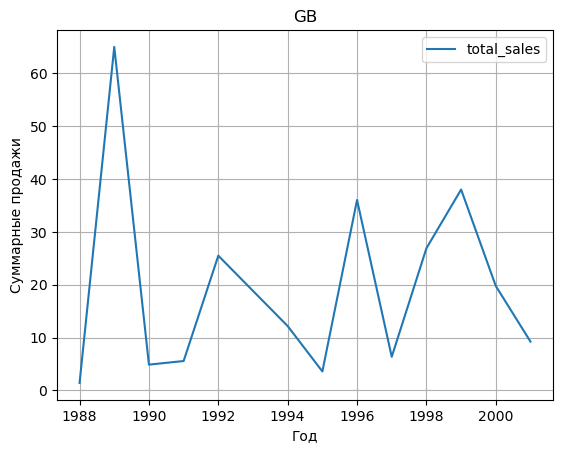

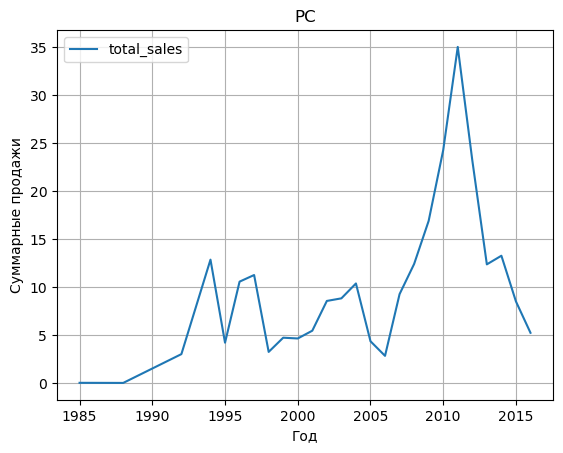

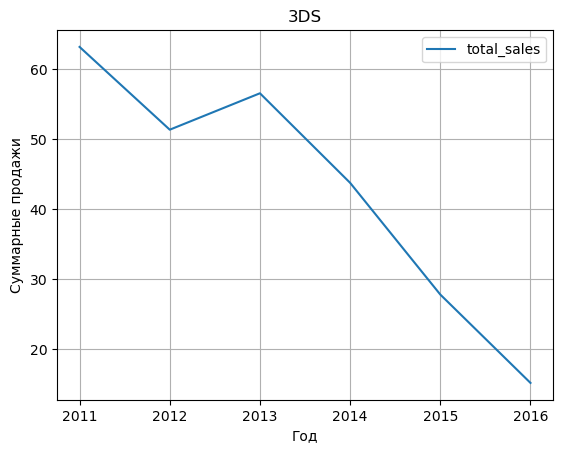

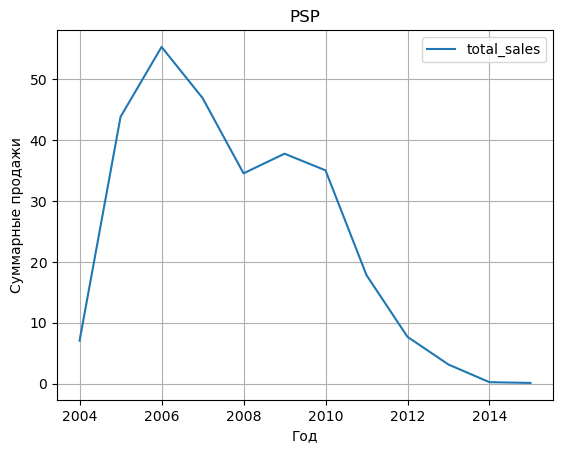

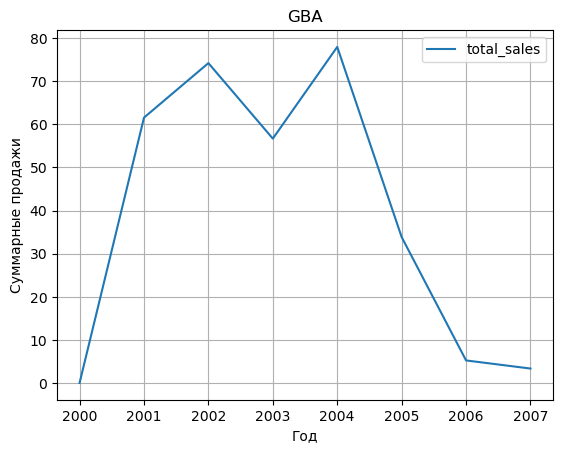

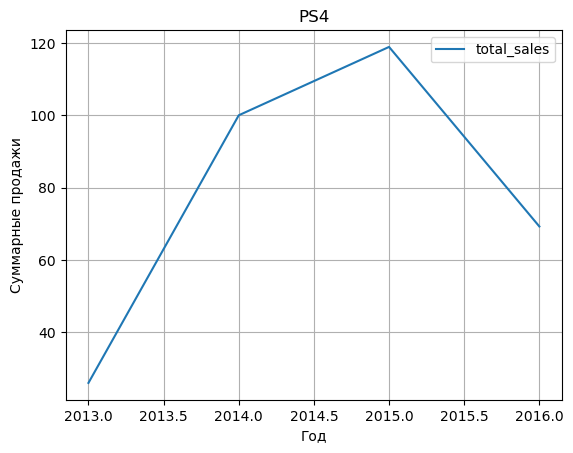

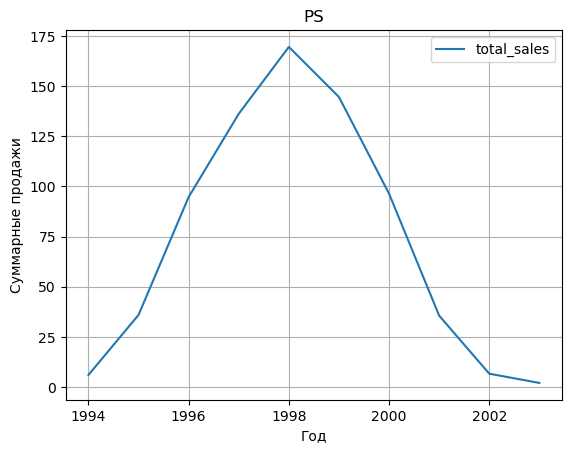

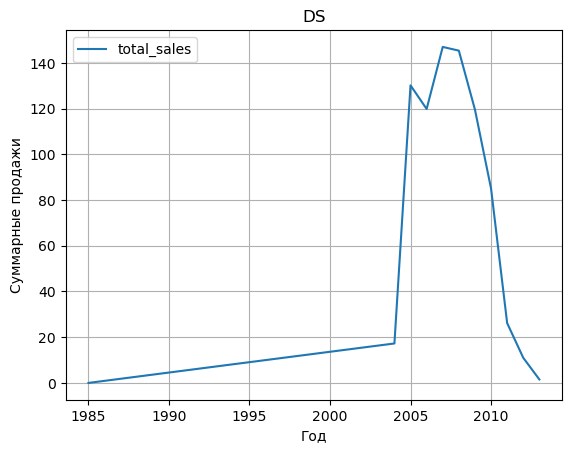

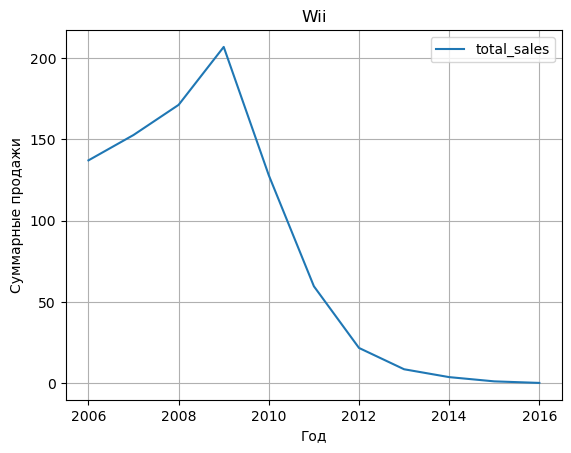

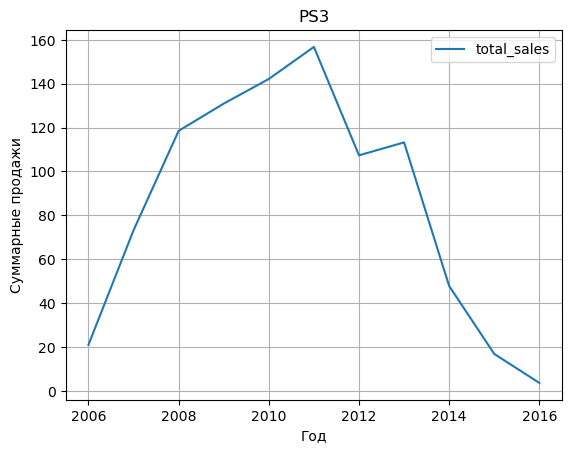

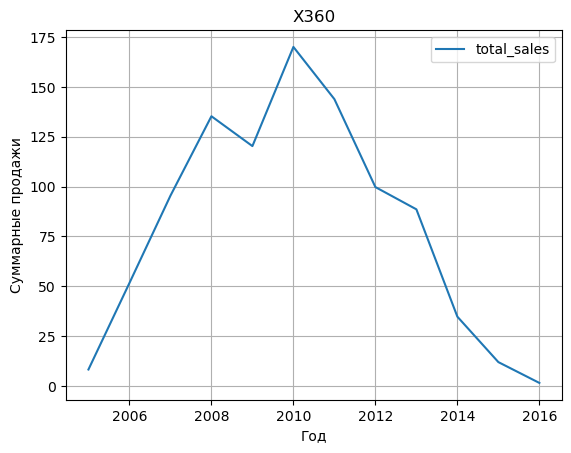

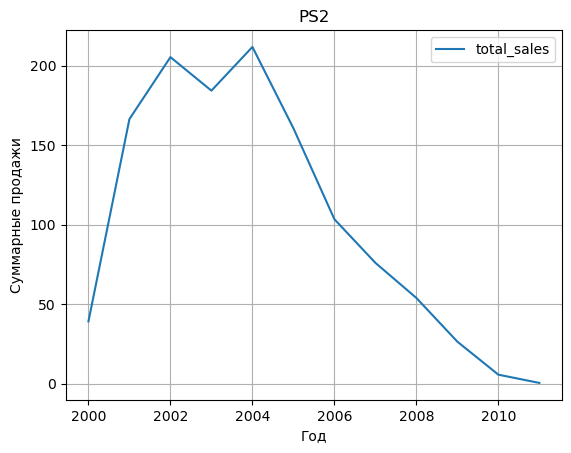

In [21]:
plt.rcParams.update({'figure.max_open_warning': 0})
for p in most_sal_plat.index:
    
    data.loc[data['platform']==p].\
    pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').\
    plot(grid=True,xlabel='Год',ylabel='Суммарные продажи',title=p);

Примерно через каждые 2 года появляется новая платформа, продолжительность жизни которой в среднем составляет 10 лет.

### Возьмите данные за соответствующий актуальный период.
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. 
Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

platform,3DS,DS,PC,PS3,PS4,PSP,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,0.18,4.60,1.52,26.15


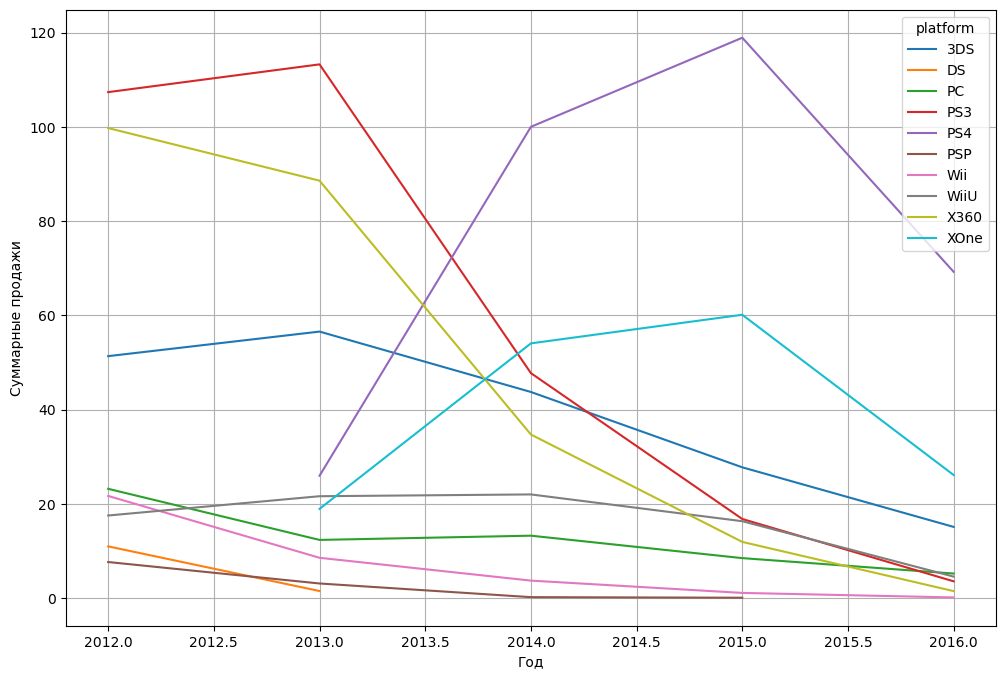

In [22]:
display(data.loc[(data['platform'].isin(most_sal_plat.index))&(data['year_of_release']>2011)].\
pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum'))
data.loc[(data['platform'].isin(most_sal_plat.index))&(data['year_of_release']>2011)].\
pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').\
plot(figsize=(12,8),grid=True,xlabel='Год',ylabel='Суммарные продажи');

В 2012 вышло почти в 2 раза меньше игр, чем в 2011 (653 и 1136 соотв.), и в последующие годы количество выпущенных игр не увеличивалось. Для исследования возьмём период с **2013** года. Наиболее перспективные платформы это PS4, WiiU, XOne (которые появились недавно - в 12-13 годах) и PC (PC из-за своей универсальности популярна во все времена).

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [23]:
actual_data = data.loc[(data['platform'].isin(most_sal_plat.index))&(data['year_of_release']>2012)].\
pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
actual_data

platform,3DS,DS,PC,PS3,PS4,PSP,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,0.18,4.60,1.52,26.15


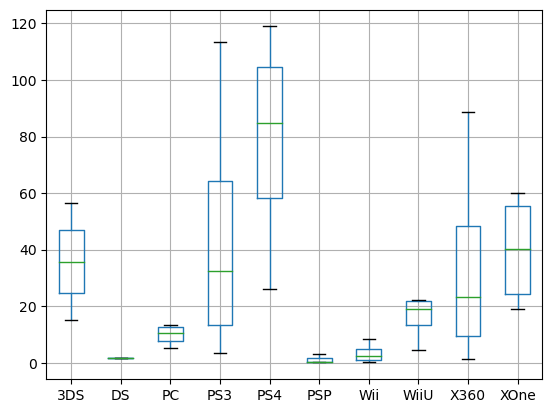

In [24]:
actual_data.boxplot();

По графикам виден разброс продаж. Самые размашистые платформы серий PS и XB.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
Сформулируйте выводы.

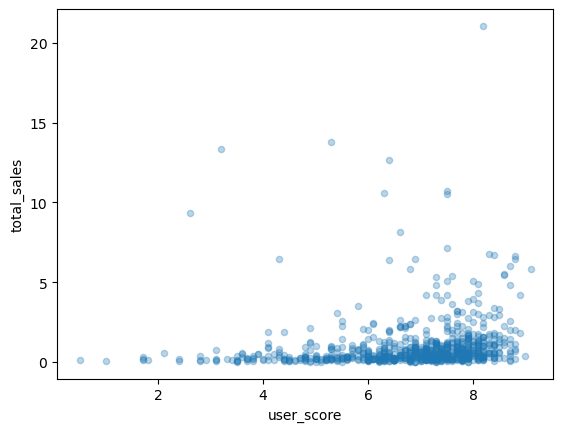

In [25]:
data.query('platform == "PS3" & user_score != -1 & critic_score != -1').\
plot(kind='scatter',x='user_score',y='total_sales',alpha=0.3);

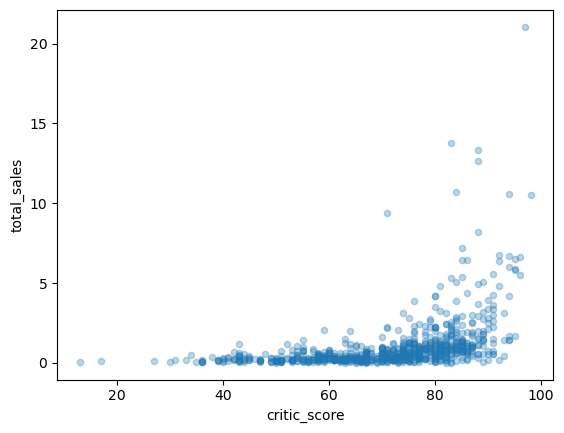

In [26]:
data.query('platform == "PS3" & user_score != -1 & critic_score != -1').\
plot(kind='scatter',x='critic_score',y='total_sales',alpha=0.3);

In [27]:
data.query('platform == "PS3" & user_score != -1 & critic_score != -1')['user_score'].\
corr(data.query('platform == "PS3" & user_score != -1 & critic_score != -1')['total_sales'])

0.1439778312570155

In [28]:
data.query('platform == "PS3" & user_score != -1 & critic_score != -1')['critic_score'].\
corr(data.query('platform == "PS3" & user_score != -1 & critic_score != -1')['total_sales'])

0.4282129041298828

Судя по корреляции, на продажи больше влияют отзывы критиков, чем оценки игроков.

### Соотнесите выводы с продажами игр на других платформах.

In [29]:
# X360
data.query('platform == "X360" & user_score != -1 & critic_score != -1')['user_score'].\
corr(data.query('platform == "X360" & user_score != -1 & critic_score != -1')['total_sales'])

0.11027967172869056

In [30]:
data.query('platform == "X360" & user_score != -1 & critic_score != -1')['critic_score'].\
corr(data.query('platform == "X360" & user_score != -1 & critic_score != -1')['total_sales'])

0.38899211557862545

In [31]:
# Wii
data.query('platform == "Wii" & user_score != -1 & critic_score != -1')['user_score'].\
corr(data.query('platform == "Wii" & user_score != -1 & critic_score != -1')['total_sales'])

0.11063675382808995

In [32]:
data.query('platform == "Wii" & user_score != -1 & critic_score != -1')['critic_score'].\
corr(data.query('platform == "Wii" & user_score != -1 & critic_score != -1')['total_sales'])

0.17085459105550824

In [33]:
# DS
data.query('platform == "DS" & user_score != -1 & critic_score != -1')['user_score'].\
corr(data.query('platform == "DS" & user_score != -1 & critic_score != -1')['total_sales'])

0.13997552383458337

In [34]:
data.query('platform == "DS" & user_score != -1 & critic_score != -1')['critic_score'].\
corr(data.query('platform == "DS" & user_score != -1 & critic_score != -1')['total_sales'])

0.23225806699643323

In [35]:
# PC
data.query('platform == "PC" & user_score != -1 & critic_score != -1')['user_score'].\
corr(data.query('platform == "PC" & user_score != -1 & critic_score != -1')['total_sales'])

0.0035962323378450757

In [36]:
data.query('platform == "PC" & user_score != -1 & critic_score != -1')['critic_score'].\
corr(data.query('platform == "PC" & user_score != -1 & critic_score != -1')['total_sales'])

0.25726098104273293

Корреляция подтверждается и для других платформ.

### Посмотрите на общее распределение игр по жанрам.
Что можно сказать о самых прибыльных жанрах?
Выделяются ли жанры с высокими и низкими продажами?

In [37]:
data[data['year_of_release']>2012].groupby('genre')['name'].count().sort_values()

genre
Puzzle           17
Strategy         56
Simulation       62
Platform         74
Fighting         80
Racing           85
Misc            155
Shooter         187
Sports          214
Adventure       245
Role-Playing    292
Action          766
Name: name, dtype: int64

In [38]:
data[data['year_of_release']>2012].groupby('genre')['total_sales'].median().sort_values()

genre
Adventure       0.030
Puzzle          0.060
Strategy        0.080
Misc            0.100
Simulation      0.100
Action          0.110
Racing          0.120
Fighting        0.125
Role-Playing    0.125
Platform        0.225
Sports          0.240
Shooter         0.450
Name: total_sales, dtype: float64

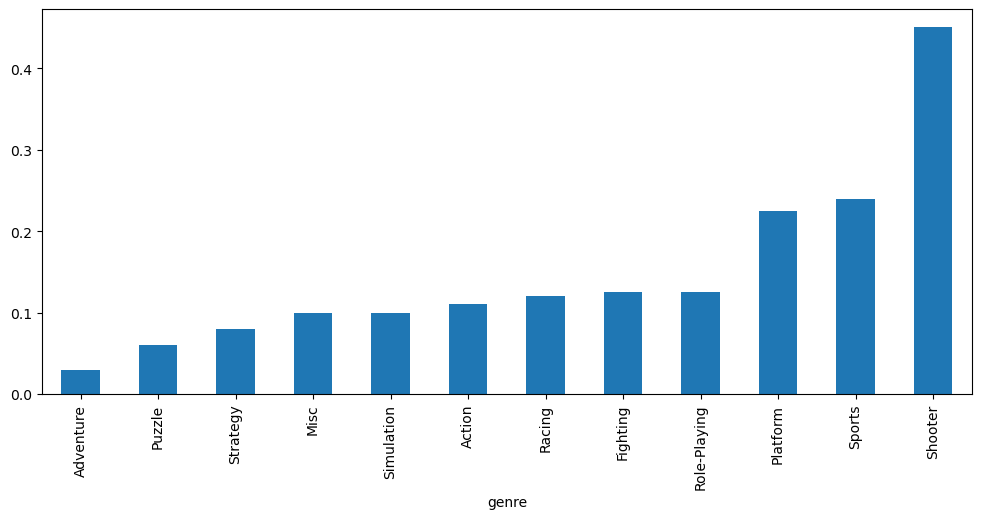

In [112]:
data[data['year_of_release']>2012].groupby('genre')['total_sales'].median().sort_values().plot(kind='bar',figsize=(12,5));

Больше всего за период с 2012 года вышло игр жанра Action. Самым прибыльным был жанр Shooter. Как видно на гистограмме наиболее прибыльные жанры (особенно первое место) отчетливо выделяются.

## Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

platform
X360    0.150
XOne    0.120
WiiU    0.090
PS4     0.060
Wii     0.040
PS3     0.030
DS      0.015
3DS     0.000
PC      0.000
PSP     0.000
Name: na_sales, dtype: float64

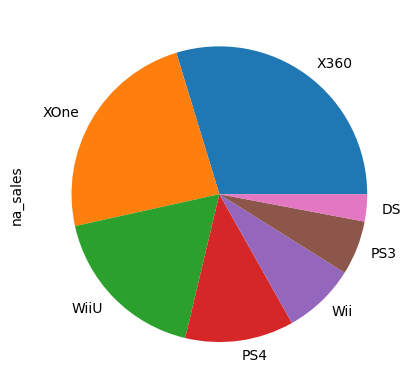

In [40]:
display(data[data['year_of_release']>2012].groupby('platform')['na_sales'].median().sort_values(ascending=False).head(10))
data[data['year_of_release']>2012].groupby('platform')['na_sales'].median().sort_values(ascending=False).head(10).plot.pie(normalize=True);

platform
Wii     0.100
DS      0.095
PS4     0.080
X360    0.080
WiiU    0.070
XOne    0.070
PC      0.060
PS3     0.020
3DS     0.000
PSP     0.000
Name: eu_sales, dtype: float64

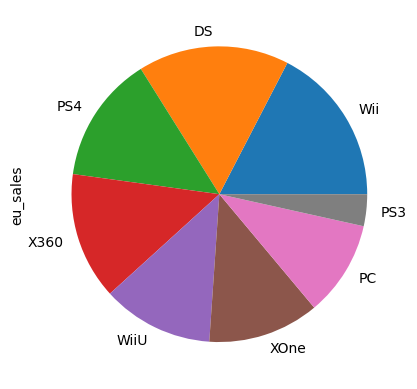

In [41]:
display(data[data['year_of_release']>2012].groupby('platform')['eu_sales'].median().sort_values(ascending=False).head(10))
data[data['year_of_release']>2012].groupby('platform')['eu_sales'].median().sort_values(ascending=False).head(10).plot.pie(normalize=True);

platform
3DS     0.06
PS3     0.03
PSV     0.03
PSP     0.02
PS4     0.01
DS      0.00
PC      0.00
Wii     0.00
WiiU    0.00
X360    0.00
Name: jp_sales, dtype: float64

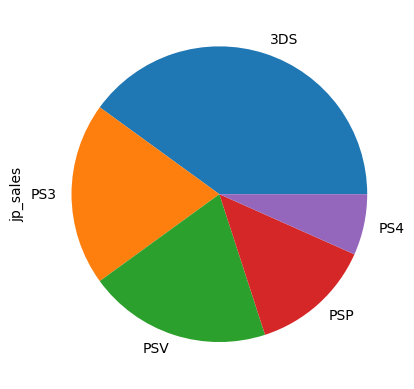

In [42]:
display(data[data['year_of_release']>2012].groupby('platform')['jp_sales'].median().sort_values(ascending=False).head(10))
data[data['year_of_release']>2012].groupby('platform')['jp_sales'].median().sort_values(ascending=False).head(10).plot.pie(normalize=True);

В NA больший потребительский потенциал. 1 и 2 место по популярности занимают X360 и XOne. Доля продаж XOne на 20% меньше, чем у X360. В EU 5 популярных платформ это: Wii, DS, PS4, X360, WiiU с относительно небольшой разницей в долях продаж 5-10%. В JP 1 место занимает платформа 3DS, у которой доля продаж игр в 2 раза больше, чем у 2 и 3 места (PS3 и PSV).

### Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные жанры (топ-5). Поясните разницу.

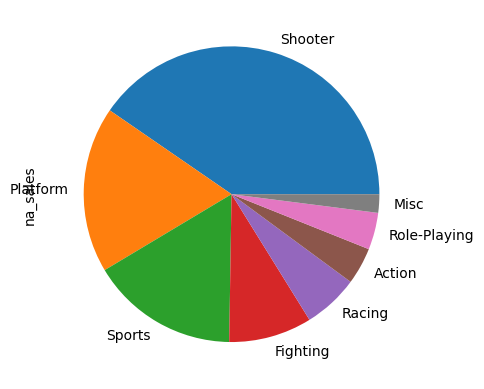

In [43]:
data[data['year_of_release']>2012].groupby('genre')['na_sales'].median().sort_values(ascending=False)
data[data['year_of_release']>2012].groupby('genre')['na_sales'].median().sort_values(ascending=False).plot.pie(normalize=True);

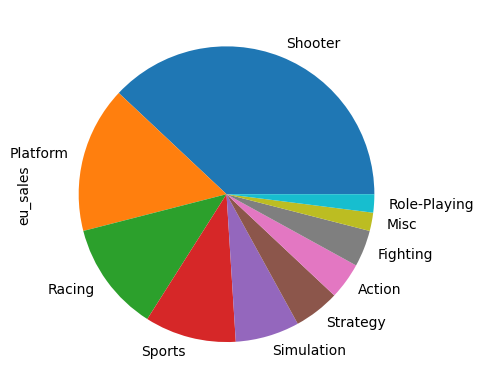

In [44]:
data[data['year_of_release']>2012].groupby('genre')['eu_sales'].median().sort_values(ascending=False)
data[data['year_of_release']>2012].groupby('genre')['eu_sales'].median().sort_values(ascending=False).plot.pie(normalize=True);

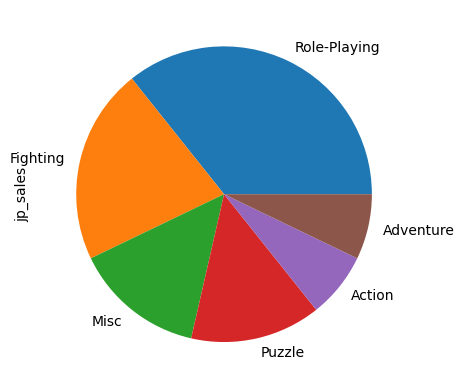

In [45]:
data[data['year_of_release']>2012].groupby('genre')['jp_sales'].median().sort_values(ascending=False)
data[data['year_of_release']>2012].groupby('genre')['jp_sales'].median().sort_values(ascending=False).plot.pie(normalize=True);

Во регионах NA и EU наиболее популярными жанрами являются Shooter и Platform. Лидеры среди жанров в JP - Role-Playing и Fighting. Возможно, это отличие связано с культурой жителей региона.

### Определите для пользователя каждого региона (NA, EU, JP):
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

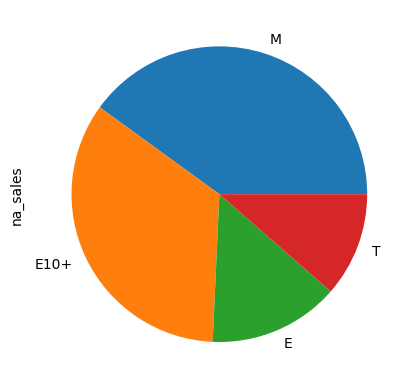

In [46]:
data[(data['year_of_release']>2012)&(data['rating']!=-1)].\
groupby('rating')['na_sales'].median().sort_values(ascending=False).plot.pie(normalize=True);

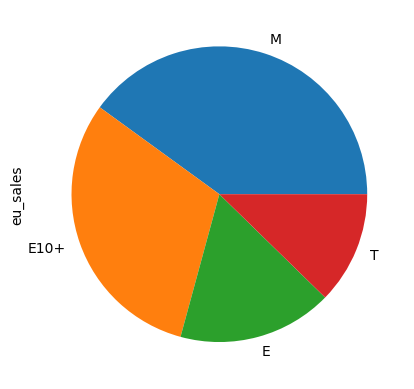

In [47]:
data[(data['year_of_release']>2012)&(data['rating']!=-1)].\
groupby('rating')['eu_sales'].median().sort_values(ascending=False).plot.pie(normalize=True);

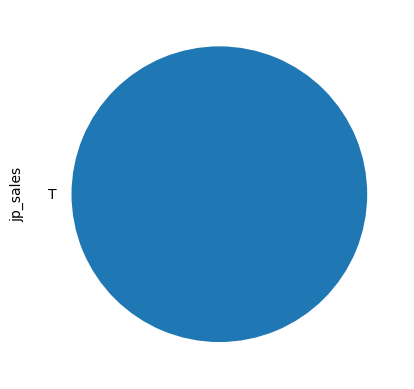

In [48]:
data[(data['year_of_release']>2012)&(data['rating']!=-1)].\
groupby('rating')['jp_sales'].median().sort_values(ascending=False).plot.pie(normalize=True);

В регионах NA и EU наиболее распространены игры с рейтингами M, E, T. В JP, в основном, рейтинг T.

## 📊 Шаг 5. Проверьте гипотезы
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.    

### 📊 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [49]:
# H0: средняя оценка пользователей игр XONE == средняя оценка пользователей игр PC
# H1: средняя оценка пользователей игр XONE != средняя оценка пользователей игр PC
alpha = 0.05
# выборки записываем в переменные
musx = data[(data['platform']=='XOne')&(data['user_score']>-1)&(data['year_of_release']>2012)]['user_score']
print('Средняя оценка XOne',musx.mean())
musp = data[(data['platform']=='PC')&(data['user_score']>-1)&(data['year_of_release']>2012)]['user_score']
print('Средняя оценка PC',musp.mean())
res = st.ttest_ind(musx,musp)
print('p-значение:', res.pvalue)
if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя оценка XOne 6.52142857142857
Средняя оценка PC 6.269677419354836
p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


### 📊 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [50]:
# H0: средняя оценка пользователей игр жанра Action == средняя оценка пользователей игр жанра Sports
# H1: средняя оценка пользователей игр жанра Action != средняя оценка пользователей игр жанра Sports
alpha = 0.05
# выборки записываем в переменные
musa = data[(data['genre']=='Action')&(data['user_score']>-1)&(data['year_of_release']>2012)]['user_score']
print('Средняя оценка Action',musa.mean())
muss = data[(data['genre']=='Sports')&(data['user_score']>-1)&(data['year_of_release']>2012)]['user_score']
print('Средняя оценка Sports',muss.mean())
# метод вызываем с параметром equal_var=false, т.к. выборки разных размеров
res = st.ttest_ind(musa,muss,equal_var=False)
print('p-значение:', res.pvalue)
if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя оценка Action 6.837532133676097
Средняя оценка Sports 5.238124999999999
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Нулевую гипотезу сформулировал так, что бы в сравнении был знак =. Для проверки гипотез использовал метод проверки гипотезы о равенстве среднего двух генеральных совокупностей ttest_ind, так как данные выборок не зависят друг от друга. Параметр equal_var при сравнении жанров указал false, т.к. в выборках разное кол-во элементов. 

## Напишите общий вывод

1. Были исследованы данные за период с 1980 по 2016 год: сколько выпускалось игр, как менялись продажи по платформам, распределение игр по жанрам.
2. Выбран актуальный период с 2012 по 2016 год.
- за это время ежегодное количество выпускаемых игр колеблется в диапазоне 500-650;
- наиболее популярные платформы серий PS, Wii, XB. XONE и PS4 появились в 2013 году;
- наиболее популярные жанры: Shooter, Sports, Platform, Fighting, Role-Playing.
3. Составлен портрет пользователя по 3 регионам - NA, EU, JP.
- пользователи NA тратят на игры больше средств, популярные жанры Shooter, Platform, Sports, популярные платформы серии XB;
- в EU популярны платформы - Wii, DS, PS4, X360, WiiU, жанры - Shooter, Platform, Racing;
- в JP самая популярная платформа 3DS, также популярны платформы серии PS, предпочитаемые жанры - Role-Playing, Fighting.
4. Проверены гипотезы.
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - полученные данные не протеворечат гипотезе.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - полученные данные не протеворечат гипотезе.
<br>
Исходя из этих выводов, можно предположить, что выгоднее будет рекламная кампания в поддержку игр жанров Action, Sports, для платформ XONE и PS4 (наиболее молодые и перспективные) в регионе NA.